# TP3 - Classification CSGO Datasets

Mục đích của TP này : dự đoán cột target là đúng hay sai về việc thắng hay thua thông qua các cột features

In [1]:
# Check the directory now where i'm working
import os
print("Working directory:", os.getcwd())

Working directory: c:\Users\KTANG\Downloads\Python\Learn DS\TPs\TP3 - Classification CSGO


In [2]:
import pandas as pd

### ML Pipeline

![image.png](../ML_Pipeline.png)

### B1 : Data collection : phải đi làm mới có (bỏ qua)
### Bước giữa B1 và B2 : Importing data

In [3]:
df = pd.read_csv("csgo.csv", delimiter=",")

# Theo logic, các giá trị ngày tháng năm và cột team a, team b không ảnh hưởng đến kết quả thắng thua hay hòa nên ta xóa đi
df.drop(columns=["day", "month", "year", "date", "team_a_rounds", "team_b_rounds"], axis=1, inplace=True)
df


,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,Win
1,Mirage,336.0,2592.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,Lost
2,Mirage,414.0,2731.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,Win
3,Mirage,317.0,2379.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,Lost
4,Mirage,340.0,3467.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,Tie
...,...,...,...,...,...,...,...,...,...,...,...
1128,Dust II,2.0,1573.0,46.0,12.0,2.0,20.0,0.0,16.0,26.0,Lost
1129,Dust II,29.0,2126.0,41.0,19.0,6.0,21.0,2.0,31.0,51.0,Lost
1130,Dust II,10.0,2555.0,17.0,9.0,3.0,20.0,2.0,55.0,30.0,Lost
1131,Dust II,9.0,2293.0,20.0,11.0,4.0,20.0,1.0,27.0,31.0,Lost


In [4]:
# Vì cột target ta chọn ở đây là cột result có định dạng là chữ nên ta phải mã hóa nó, đầu tiên kiểm tra các giá trị riêng biệt của nó
print(df["result"].unique())


['Win' 'Lost' 'Tie']


Mã hóa cột target (Cách 1 : thứ tự giá trị theo alphabet nhờ LabelEncoder)

In [5]:
# Mã hóa cột target bằng LabelEncoder trong thư viện sklearn.preprocessing
from  sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df["result"] = LE.fit_transform(df["result"])
print(df["result"].unique())
df # Win là 2, Loss là 0, Tie là 1

[2 0 1]


,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,2
1,Mirage,336.0,2592.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,0
2,Mirage,414.0,2731.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,2
3,Mirage,317.0,2379.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,0
4,Mirage,340.0,3467.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1128,Dust II,2.0,1573.0,46.0,12.0,2.0,20.0,0.0,16.0,26.0,0
1129,Dust II,29.0,2126.0,41.0,19.0,6.0,21.0,2.0,31.0,51.0,0
1130,Dust II,10.0,2555.0,17.0,9.0,3.0,20.0,2.0,55.0,30.0,0
1131,Dust II,9.0,2293.0,20.0,11.0,4.0,20.0,1.0,27.0,31.0,0


Mã hóa cột target (Cách 2 : thứ tự giá trị theo ý của ta nhờ mapping và thêm cột target phụ)

In [6]:
# Vì LabelEncoder sẽ đặt số theo alphabet nên các giá trị sẽ theo hệ alphabet và ko có thứ tự như ta muốn
# Nên nếu cần thứ tự thì sử dụng cách này

# Tạo một dictionary để làm mapping theo muốn
# label_mapping = {
#     'Lost': 0,
#     'Win': 1,
#     'Tie': 2
# }

# # Mã hóa thủ công
# df['target'] = df['result'].map(label_mapping)

# print(df['target'].unique())  # Kết quả: [1, 0, 2]

# df.drop(columns=["result"], axis=1, inplace=True) # Xong thì xóa cột result và để lại cột "target" để làm target
# df.rename(columns={"target" : "result"})
# df

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   map           1133 non-null   object 
 1   wait_time_s   1133 non-null   float64
 2   match_time_s  1133 non-null   float64
 3   ping          1133 non-null   float64
 4   kills         1133 non-null   float64
 5   assists       1133 non-null   float64
 6   deaths        1133 non-null   float64
 7   mvps          1133 non-null   float64
 8   hs_percent    1133 non-null   float64
 9   points        1133 non-null   float64
 10  result        1133 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 97.5+ KB


In [8]:
df.describe()

,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points,result
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,118.533098,2291.438658,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123,0.936452
std,134.129684,474.524327,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022,0.960080
min,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1942.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000,0.000000
50%,48.000000,2311.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000,1.000000
75%,213.000000,2648.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000,2.000000
max,589.000000,3603.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000,2.000000


In [9]:
df.iloc[[0,1]] # hoặc df.iloc[:2] để filter hai hàng đầu tiên của DataFrame

,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,2
1,Mirage,336.0,2592.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0,0


In [10]:
df.loc[0, 'ping'] # filter để lấy giá trị ô đầu tiên của cột ping

np.float64(215.0)

In [11]:
df[(df['kills'] > 10) & (df['hs_percent'] > 4)] # Filter theo yêu cầu


,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points,result
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0,2
2,Mirage,414.0,2731.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0,2
3,Mirage,317.0,2379.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0,0
4,Mirage,340.0,3467.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0,1
5,Mirage,391.0,1881.0,88.0,13.0,2.0,17.0,1.0,38.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1124,Dust II,41.0,2845.0,22.0,15.0,7.0,22.0,1.0,60.0,42.0,2
1125,Dust II,5.0,2349.0,34.0,13.0,1.0,21.0,1.0,30.0,28.0,0
1128,Dust II,2.0,1573.0,46.0,12.0,2.0,20.0,0.0,16.0,26.0,0
1129,Dust II,29.0,2126.0,41.0,19.0,6.0,21.0,2.0,31.0,51.0,0


In [12]:
df.groupby('map')[['wait_time_s','match_time_s', 'ping']].mean() # Groupby các map theo giá trị trung bình hai cột waiting time, matching time


,wait_time_s,match_time_s,ping
map,,,
Austria,156.000000,2513.000000,70.000000
Cache,138.796610,2357.440678,76.898305
Canals,193.000000,2189.000000,126.000000
Cobblestone,80.000000,2528.083333,51.083333
Dust II,132.025594,2265.248629,82.254113
Inferno,36.606061,2320.992424,43.121212
Italy,6.000000,1899.000000,34.000000
Mirage,127.267218,2303.548209,69.818182
Nuke,10.500000,2500.750000,30.250000


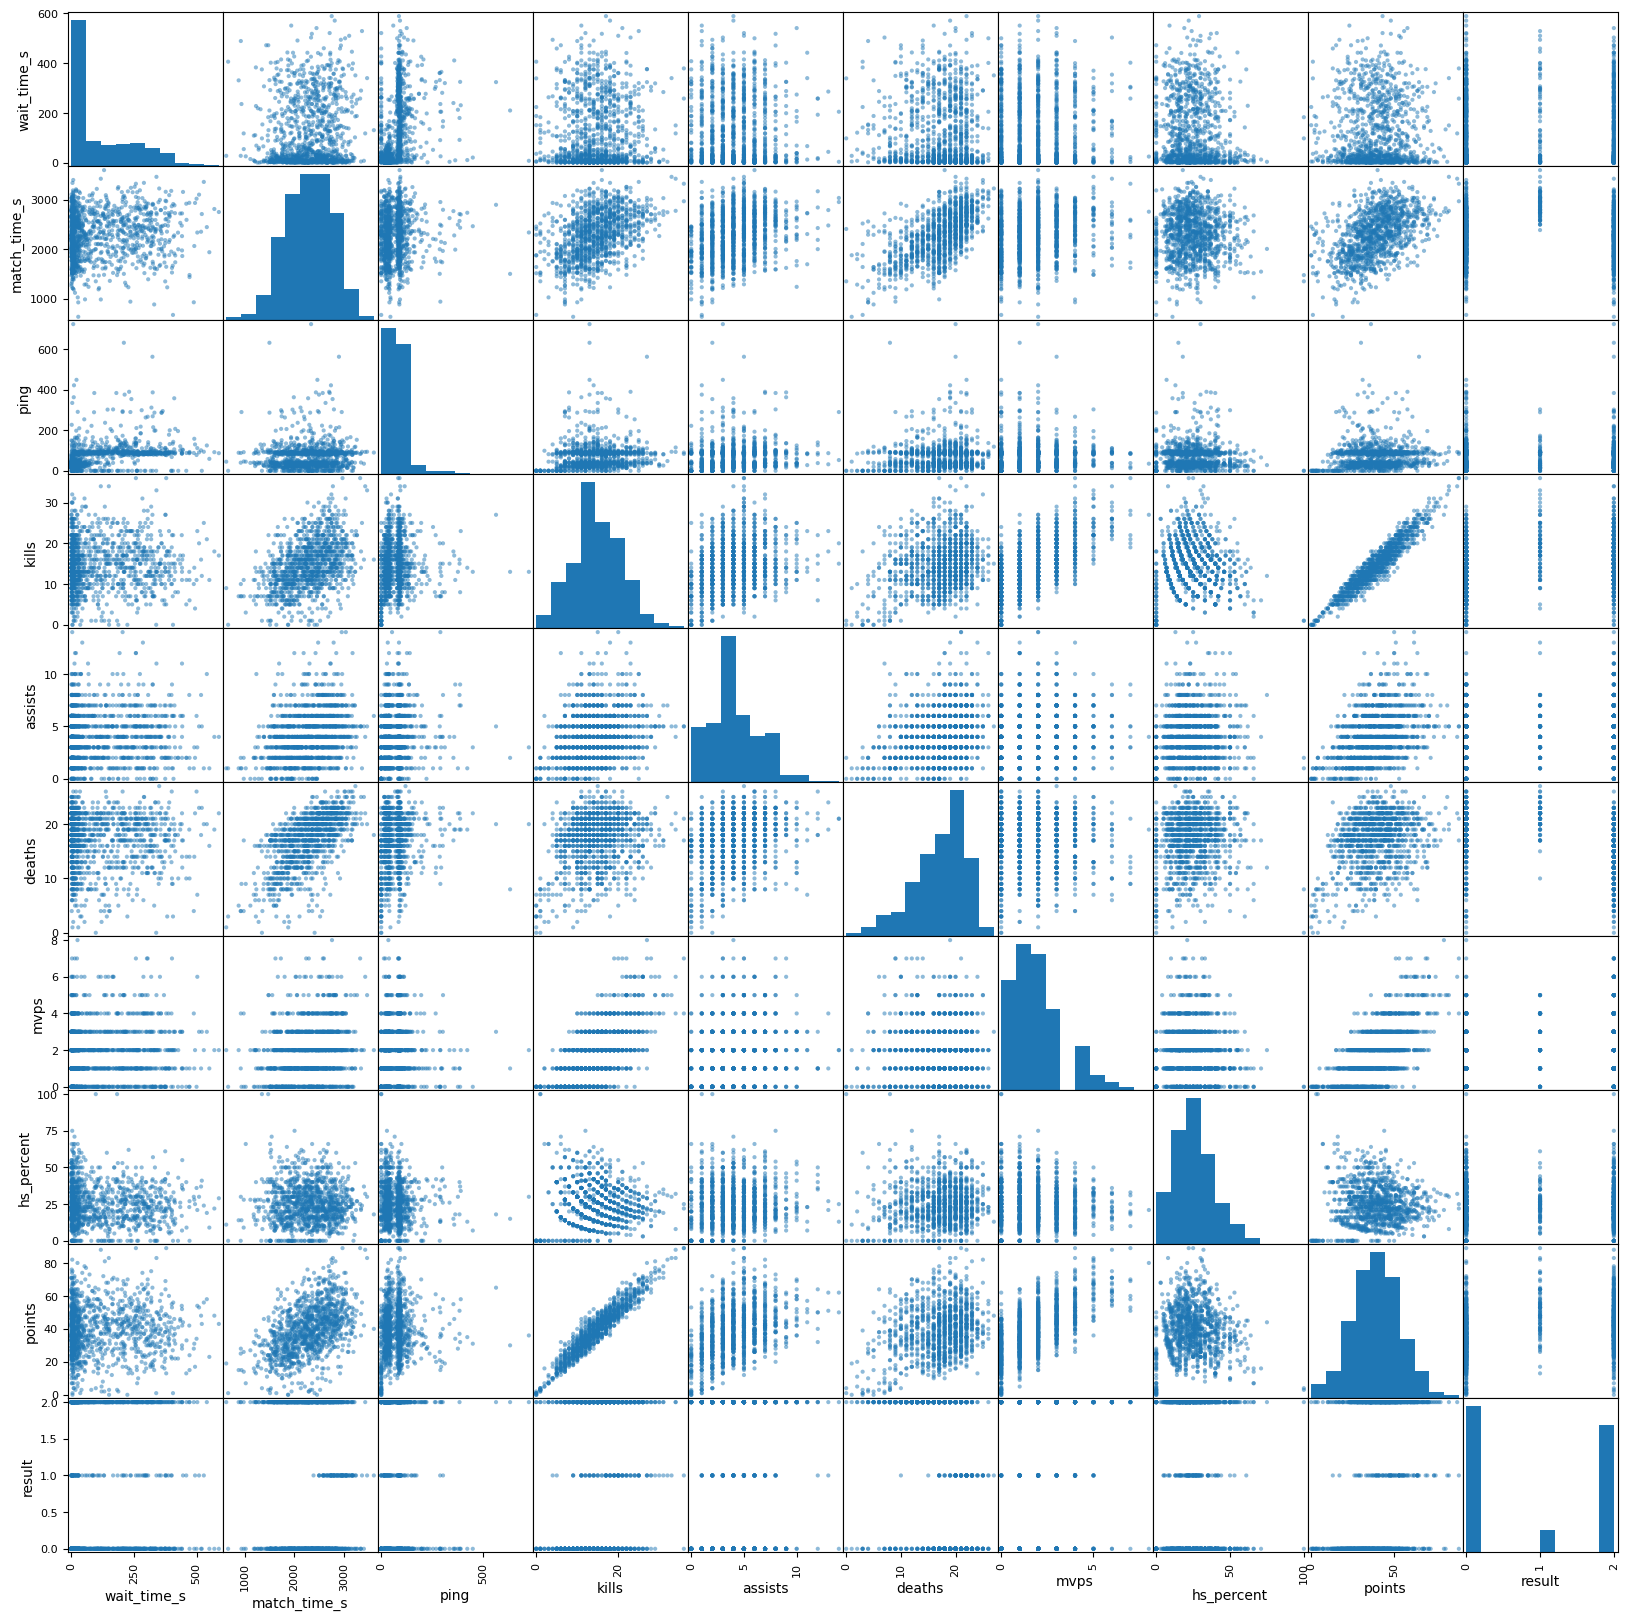

In [13]:
# Visualisation:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (20,20))
plt.show()

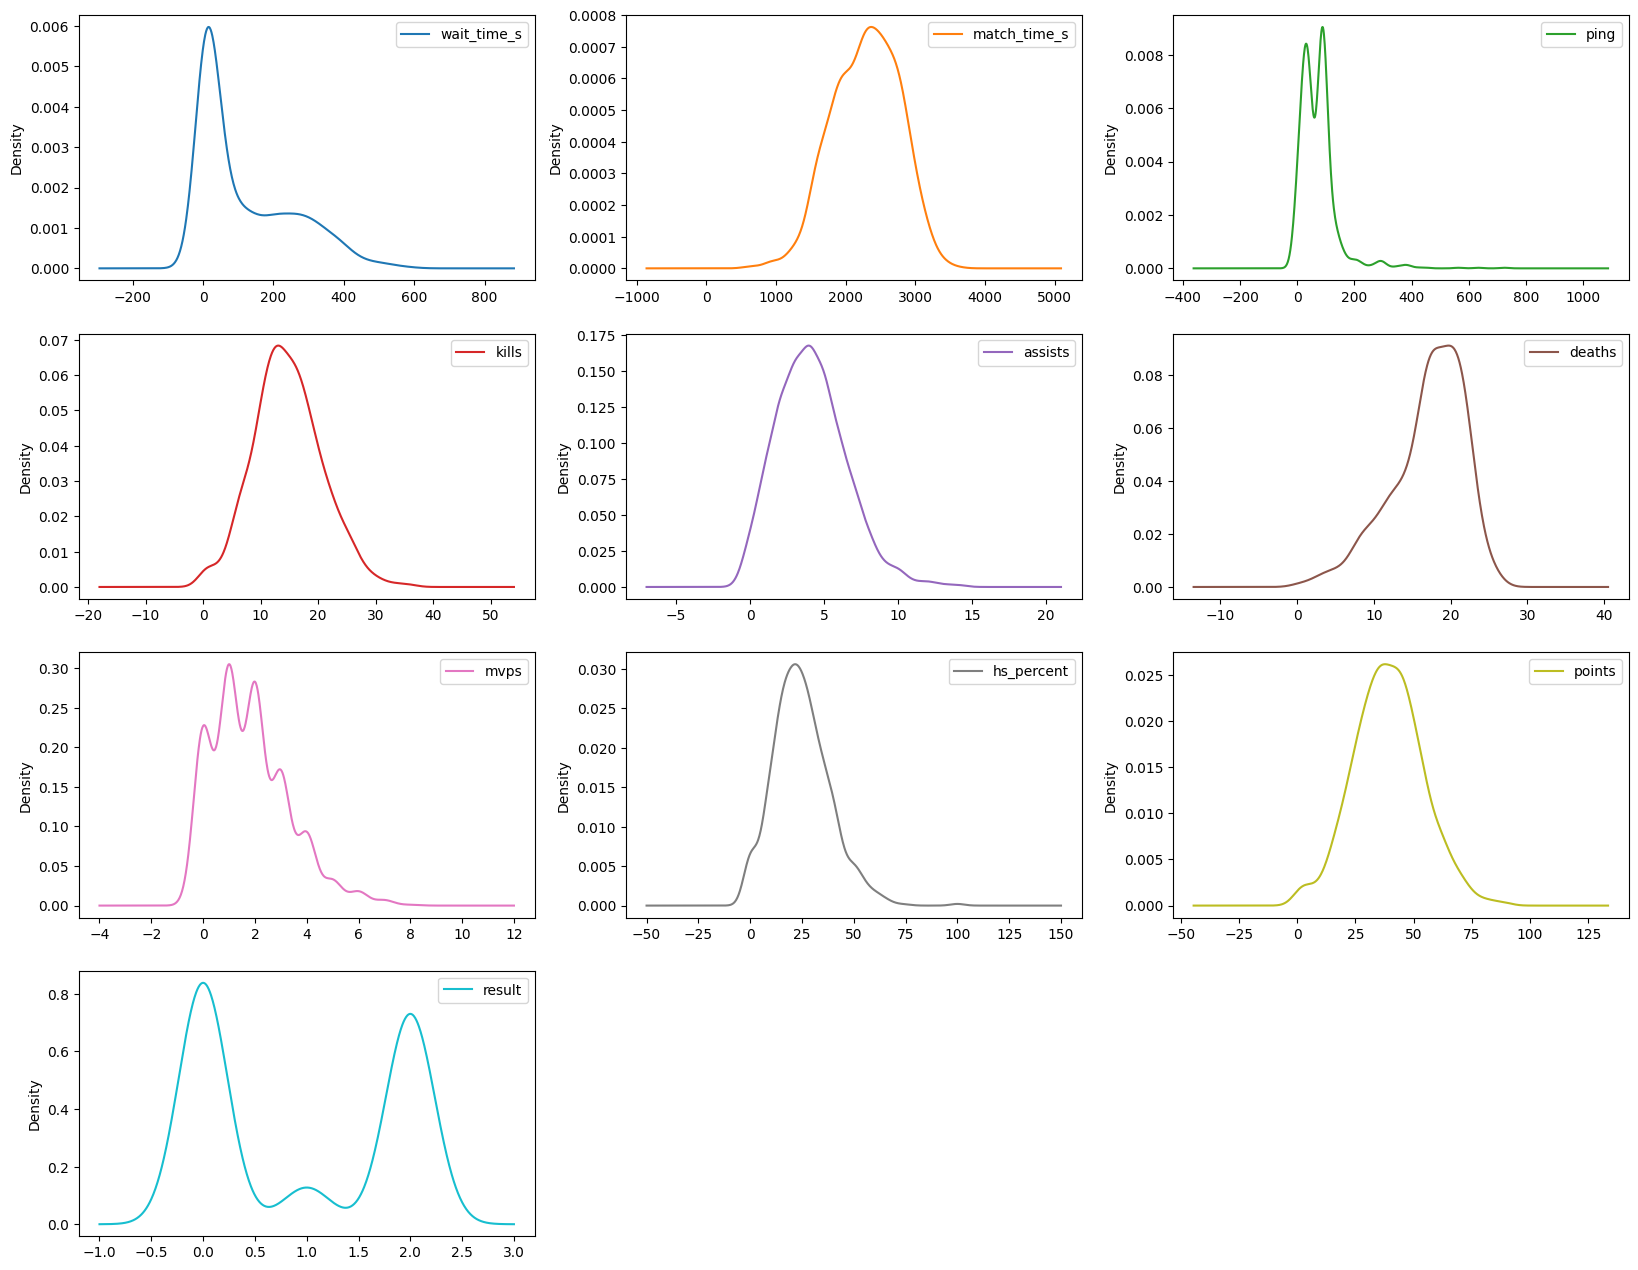

In [14]:
df.plot(kind='density', subplots=True, layout=(5,3), figsize = (20,20), sharex=False);

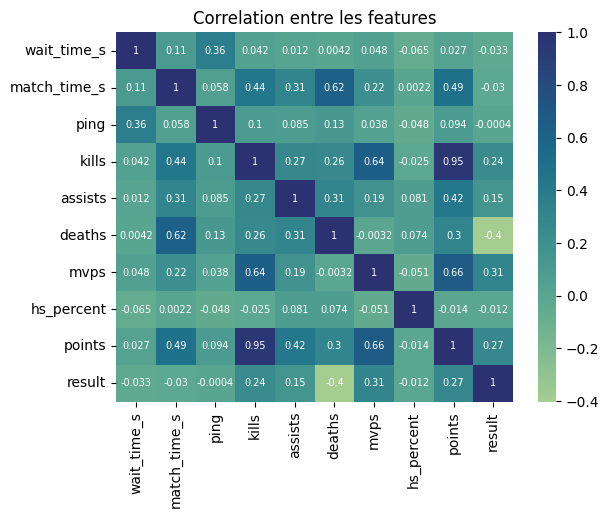

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size": 7, "c" : "w"}, cmap="crest") #annot để hiển thị số
plt.title("Correlation entre les features")
plt.show()

In [16]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Classification - CSGO Report")
# profile.to_file("Classification_CSGO_Report.html")

# Xài xong thì comment nó lại để nó chạy một lần thôi là đủ rồi 
# vì nó cũng chỉ cho ta coi dữ liệu lúc đầu chưa xử lý thôi

### Bước giữa bước B2+B4(Bước xem dữ liệu) và B3(Bước tiền xử lý dữ liệu):

Là bước chia dữ liệu theo :
- Phần A: theo chiều dọc (theo cột), tức là chia các cột X (các cột feature) với cột Y (cột target)
- Phần B: theo chiều ngang, tức là chia datasets thành 3 dataset con gồm bộ train, bộ validation và bộ test theo tỷ lệ tùy chọn (8-1-1, 9-0.5-0.5, 6-2-2)


Phần A

In [17]:
# Xác định cột target
target = "result"

# dùng lệnh drop() trong pandas để xóa hàng (đưa chỉ số vào rồi thêm lệnh axis=0) 
# hoặc cột (đưa tên cột vào rồi thêm lệnh axis=1)
# Mục tiêu: Tách các cột X (các cột features) ra
x = df.drop(target, axis = 1)

# Tách cột target (cột Y)
y = df[target]
y

0       2
1       0
2       2
3       0
4       1
       ..
1128    0
1129    0
1130    0
1131    0
1132    2
Name: result, Length: 1133, dtype: int64

Phần B : Thường cta sẽ chia thành 3 bộ train, validation và test nhưng hiện tại chia train và test trước


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Kiểm tra cột số và cột categorie
# num_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# cat_cols = x_train.select_dtypes(include=['object']).columns.tolist()

### Bước 3 : Tiền xử lý dữ liệu
Vì dataset ở đây toàn gồm các cột feature là dạng số, vậy nên ta sẽ chọn kiểu tiền xử lý dữ liệu numerical feature.

![image.png](../Preprocessing_Pipeline.png)





#### 3.0) Test Multicollinearity (Step 3 trong Pre-processing Pipeline)

Dùng Variance Inflation Factor (VIF) để test. VIF > 5 (hoặc 10) → multicollinearity nghiêm trọng

Cách đọc kết quả : 

| Index | Feature        | VIF   | Giải thích                                                           |
| ----- | -------------- | ----- | -------------------------------------------------------------------- |
| 0     | `const`        | 28.96 | ✅ Giá trị này không quan trọng, là hệ số chặn (`intercept`) → bỏ qua |
| 1     | `wait_time_s`  | 1.19  | Không có multicollinearity                                           |
| 2     | `match_time_s` | 2.03  | Vẫn ổn (VIF < 5)                                                     |
| 3     | `ping`         | 1.19  | Ổn                                                                   |
| 4     | `kills`        | 14.59 | ❗ Rất cao – **Multicollinearity nghiêm trọng**                       |
| 5     | `assists`      | 1.65  | Ổn                                                                   |
| 6     | `deaths`       | 1.82  | Ổn                                                                   |
| 7     | `mvps`         | 1.95  | Ổn                                                                   |
| 8     | `hs_percent`   | 1.02  | Ổn                                                                   |
| 9     | `points`       | 18.33 | ❗ Rất cao – **Multicollinearity nghiêm trọng**                       |



In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[["wait_time_s", "match_time_s", "ping", "kills", "assists", "deaths", "mvps", "hs_percent", "points"]]  # các biến đầu vào
X = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["VIF"]


0    28.960392
1     1.191096
2     2.026288
3     1.193531
4    14.587135
5     1.647014
6     1.816079
7     1.953746
8     1.021654
9    18.333926
Name: VIF, dtype: float64

Cách xử lý các cột bị Multicollinearity 

- Cách 1: Xoá một trong hai biến (bây giờ ta dùng cách này)
- Cách 2: Tạo một feature tổng hợp
- Cách 3: Dùng mô hình không nhạy cảm với multicollinearity



In [20]:
x

,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent,points
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0,45.0
1,Mirage,336.0,2592.0,199.0,13.0,4.0,24.0,2.0,0.0,40.0
2,Mirage,414.0,2731.0,85.0,15.0,3.0,18.0,3.0,26.0,37.0
3,Mirage,317.0,2379.0,93.0,12.0,2.0,15.0,2.0,16.0,30.0
4,Mirage,340.0,3467.0,94.0,33.0,5.0,20.0,5.0,30.0,83.0
...,...,...,...,...,...,...,...,...,...,...
1128,Dust II,2.0,1573.0,46.0,12.0,2.0,20.0,0.0,16.0,26.0
1129,Dust II,29.0,2126.0,41.0,19.0,6.0,21.0,2.0,31.0,51.0
1130,Dust II,10.0,2555.0,17.0,9.0,3.0,20.0,2.0,55.0,30.0
1131,Dust II,9.0,2293.0,20.0,11.0,4.0,20.0,1.0,27.0,31.0


In [21]:
x = x.drop(columns=["points"], axis = 1)  # hoặc drop "kills" nếu muốn giữ points
x

,map,wait_time_s,match_time_s,ping,kills,assists,deaths,mvps,hs_percent
0,Mirage,327.0,2906.0,215.0,17.0,2.0,21.0,2.0,5.0
1,Mirage,336.0,2592.0,199.0,13.0,4.0,24.0,2.0,0.0
2,Mirage,414.0,2731.0,85.0,15.0,3.0,18.0,3.0,26.0
3,Mirage,317.0,2379.0,93.0,12.0,2.0,15.0,2.0,16.0
4,Mirage,340.0,3467.0,94.0,33.0,5.0,20.0,5.0,30.0
...,...,...,...,...,...,...,...,...,...
1128,Dust II,2.0,1573.0,46.0,12.0,2.0,20.0,0.0,16.0
1129,Dust II,29.0,2126.0,41.0,19.0,6.0,21.0,2.0,31.0
1130,Dust II,10.0,2555.0,17.0,9.0,3.0,20.0,2.0,55.0
1131,Dust II,9.0,2293.0,20.0,11.0,4.0,20.0,1.0,27.0


In [22]:
# split lại các bộ train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 3.1) Preprocessing NUMERICAL FEATURE

![image.png](../Pre_processing_num_features.png)

Gồm các cột : `wait_time_s, match_time_s, ping, kills, assists, deaths, mvps, hs_percent, points`

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")),
                            ("scaler", RobustScaler())]) # Đầu tiên ta đã dùng StandardScaler và đạt Precision (weighted avg) = 0.73 và sau khi dùng RobustScaler với (weighted avg) = 0.74

# Đã cbi xong pipeline preprocessing, bây giờ fit_transform
processed_num_data = num_transformer.fit_transform(x_train[["wait_time_s", "match_time_s", 
                                                            "ping", "kills", "assists", "deaths",
                                                            "mvps", "hs_percent"]])

for idx, (i, j) in enumerate(zip(x_train[["wait_time_s", "match_time_s", "ping", "kills", "assists", "deaths", "mvps", "hs_percent"]].values, processed_num_data)):
    if idx >=5 :
        break
    print(f'{idx}, not processed data is {i}, processed data is {j}')

0, not processed data is [4.260e+02 2.336e+03 1.960e+02 8.000e+00 2.000e+00 1.800e+01 0.000e+00
 0.000e+00], processed data is [ 1.92462312  0.06426554  2.10699588 -0.85714286 -0.66666667  0.
 -1.         -1.29577465]
1, not processed data is [ 167. 2557.   92.   25.    6.   16.    6.   16.], processed data is [ 0.62311558  0.37641243  0.39506173  1.57142857  0.66666667 -0.28571429
  2.         -0.3943662 ]
2, not processed data is [1.700e+01 1.515e+03 0.000e+00 1.000e+00 1.000e+00 6.000e+00 0.000e+00
 0.000e+00], processed data is [-0.13065327 -1.09533898 -1.11934156 -1.85714286 -1.         -1.71428571
 -1.         -1.29577465]
3, not processed data is [2.690e+02 2.492e+03 8.800e+01 2.200e+01 9.000e+00 2.000e+01 1.000e+00
 2.200e+01], processed data is [ 1.13567839  0.28460452  0.32921811  1.14285714  1.66666667  0.28571429
 -0.5        -0.05633803]
4, not processed data is [1.000e+00 2.976e+03 2.500e+01 1.400e+01 3.000e+00 2.400e+01 0.000e+00
 1.400e+01], processed data is [-0.211055

#### 3.2) : Preprocessing CATEGORICAL ORDINAL
![image.png](../Pre_processing_nominal_features.png)


ở đây là cột `map`

Ý tưởng để biến đổi kiểu categorical ordinal là ta phải mã hóa các giá trị trong feature đó từ 0 đến k-1 với k là số giá trị distinct của feature đó

Kết quả sẽ trả về: **sparse matrix** (ma trận thưa), để tiết kiệm bộ nhớ.

In [24]:
from sklearn.preprocessing import OneHotEncoder

nominal_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                      ("nom_encoder", OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

processed_nominal_data = nominal_transformer.fit_transform(x_train[["map"]])

for idx, (i,j) in enumerate(zip(x_train[["map"]].values, processed_nominal_data)):
    if idx < 10:
        print(f'{idx}, not processed data is {i}, processed data is {j}')

0, not processed data is ['Cache'], processed data is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1, not processed data is ['Dust II'], processed data is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
2, not processed data is ['Inferno'], processed data is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3, not processed data is ['Dust II'], processed data is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4, not processed data is ['Dust II'], processed data is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5, not processed data is ['Dust II'], processed data is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
6, not processed data is ['Inferno'], processed data is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7, not processed data is ['Dust II'], processed data is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
8, not processed data is ['Inferno'], processed data is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9, not processed data is ['Mirage'], processed data is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


3.3) Conclusion : 

Đưa các transformer trên về một nhóm để sau này khi fit dữ liệu vào thì ta sẽ chỉ ra các transformer này ta dùng để xử lý cột nào, cad gộp các phép transformer trên vài một hàm để dễ dàng sử dụng hơn.

In [25]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers= [
    ("nominal_features", nominal_transformer, ["map"]),
    ("num_features", num_transformer, ["wait_time_s", "match_time_s", "ping", "kills", "assists", "deaths", "mvps", "hs_percent"])
])
preprocessor

ColumnTransformer(transformers=[('nominal_features',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('nom_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['map']),
                                ('num_features',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['wait_time_s', 'match_time_s', 'ping',
                                  'kills', 'assists', 'deaths', 'mvps',
                                  'hs_percent'])])

Giả sử bây giờ tôi muốn xem rằng sau khi đã tiền xử lý thì bộ dataset của chúng ta bây giờ trông như thế nào trước khi đưa nó vào mô hình, ta làm như sau (TRICK !!)

In [26]:
pd.options.display.float_format = '{:.5f}'.format

In [28]:
step_preprocessing = Pipeline(steps= [
    ("preprocessor", preprocessor)
])

processed_data = step_preprocessing.fit_transform(x_train)
view_processed_data = pd.DataFrame(processed_data)
view_processed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.92462,0.06427,2.10700,-0.85714,-0.66667,0.00000,-1.00000,-1.29577
1,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62312,0.37641,0.39506,1.57143,0.66667,-0.28571,2.00000,-0.39437
2,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-0.13065,-1.09534,-1.11934,-1.85714,-1.00000,-1.71429,-1.00000,-1.29577
3,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.13568,0.28460,0.32922,1.14286,1.66667,0.28571,-0.50000,-0.05634
4,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.21106,0.96822,-0.70782,0.00000,-0.33333,0.85714,-1.00000,-0.50704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-0.17588,-0.56144,-0.36214,0.00000,-0.33333,-0.14286,-1.00000,-0.11268
902,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,-0.11558,-0.83686,-0.59259,-0.28571,0.00000,-0.14286,-1.00000,0.11268
903,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.16583,0.37359,-0.83951,-0.71429,-0.33333,0.28571,0.00000,1.80282
904,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.17085,0.24788,0.08230,0.85714,0.66667,0.28571,-0.50000,0.11268


### Bước 5: Chọn mô hình

Ta thấy rằng cột target **KHÔNG** có hệ thống tương quan lớn đối với 2 cột numerical features, vì vậy đầu tiên tôi nghĩ đến sẽ chọn **MÔ HÌNH PHI TUYẾN** như `K-nearest-neighbours, Decision Tree, Random Forest, Support Vector Machine`



5.1) Mô hình đầu tiên : `RandomForestClassifier` trong thư viện `sklearn.ensemble`

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Ta lại sử dụng hàm Pipeline để huấn luyện mô hình
model1 = ImbPipeline(steps = [
    ("preprocessor", preprocessor),
    ('smote', SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(class_weight='balanced' ,random_state=42))
])

params = {
    "classifier__n_estimators": [50,100,200],
    "classifier__criterion" : ["gini", "entropy", "log_loss"],
    "classifier__max_depth": [None, 5, 10, 20],
    "classifier__min_samples_split" : [2, 5],
    "preprocessor__num_features__imputer__strategy" : ["median", "mean"]
}

scores = {
    'precision_macro': 'precision_macro',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'roc_auc_ovr': 'roc_auc_ovr',
    'roc_auc_ovo': 'roc_auc_ovo'
}

gridsearchcv_model1 = GridSearchCV(model1, param_grid= params , scoring = scores, refit = 'roc_auc_ovr' , cv=4, verbose = 2, n_jobs=-1)


Ta cho máy học và dự đoán dựa trên model1 bởi GridSearchCV

In [42]:
gridsearchcv_model1.fit(x_train, y_train);

Fitting 4 folds for each of 144 candidates, totalling 576 fits


Vì tôi đã sử dụng **multi-metrics scoring** để cho vào parameter scoring nên giờ tôi phải in ra các bộ metrics kèm performance tốt nhất để chọn, default tôi đã để **refit = roc_auc_ovo** nếu có metric nào tốt hơn thì sẽ thay

In [43]:
import pandas as pd

# Giả sử bạn đã fit xong GridSearchCV
results = pd.DataFrame(gridsearchcv_model1.cv_results_)

# Lấy các cột scoring
score_cols = sorted([col for col in results.columns if col.startswith('mean_test_')])

# Tìm index tốt nhất của từng metric
best_indices = {col: results[col].idxmax() for col in score_cols}

# Tạo bảng tóm tắt các metric tốt nhất và params tương ứng
summary_rows = []

for col in score_cols:
    idx = best_indices[col]
    summary_rows.append({
        'metric': col.replace('mean_test_', ''),
        'score': results[col][idx],
        'params': results['params'][idx]
    })

summary_df = pd.DataFrame(summary_rows).sort_values(by='score', ascending=False)

# In ra bảng kết quả
print(summary_df)


               metric   score  \
4         roc_auc_ovr 0.87489   
3         roc_auc_ovo 0.87263   
1  precision_weighted 0.77070   
2     recall_weighted 0.73729   
0     precision_macro 0.64228   

                                              params  
4  {'classifier__criterion': 'entropy', 'classifi...  
3  {'classifier__criterion': 'entropy', 'classifi...  
1  {'classifier__criterion': 'entropy', 'classifi...  
2  {'classifier__criterion': 'gini', 'classifier_...  
0  {'classifier__criterion': 'gini', 'classifier_...  


In [44]:
# Vì GridSearchCV dựa trên nguyên lý Cross-validation nên đây là các điểm dựa trên bộ VALIDATION
print(gridsearchcv_model1.best_estimator_)

print(gridsearchcv_model1.best_params_)
print(gridsearchcv_model1.best_score_) # đây là điểm dựa trên thông số R2 tốt nhất trên bộ VALIDATION
print(gridsearchcv_model1.best_index_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('nom_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['map']),
                                                 ('num_features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                 


### Bước 6: Đánh giá mô hình

Để coi lý thuyết về hàm predict(), coi TP1 Bước 6




6.1) In ra để so sánh dữ liệu thực tế với dữ liệu thực tế

In [45]:
y_predict1 = gridsearchcv_model1.predict(x_test)

In [46]:
for idx, (i,j) in enumerate(zip(y_predict1, y_test)):
    if idx >= 10 :
        break
    print(f'{idx}, Giá trị dự đoán là {i}, giá trị thực tế là {j}')

0, Giá trị dự đoán là 2, giá trị thực tế là 0
1, Giá trị dự đoán là 2, giá trị thực tế là 2
2, Giá trị dự đoán là 2, giá trị thực tế là 2
3, Giá trị dự đoán là 0, giá trị thực tế là 0
4, Giá trị dự đoán là 1, giá trị thực tế là 1
5, Giá trị dự đoán là 1, giá trị thực tế là 0
6, Giá trị dự đoán là 0, giá trị thực tế là 2
7, Giá trị dự đoán là 2, giá trị thực tế là 2
8, Giá trị dự đoán là 0, giá trị thực tế là 0
9, Giá trị dự đoán là 2, giá trị thực tế là 2


6.2) Dùng các metrics : ở đây trong bài toán classification, ta có các metric như accuracy, f1 ,...

Trong bài toán multiclass classification, khi bạn dùng các hàm `f1_score, precision_score, recall_score` thì có 1 số lưu ý quan trọng để tránh lỗi, đặc biệt là với f1_score, precision_score và recall_score vì chúng cần biết cách tổng hợp (averaging) các lớp lại với nhau bằng cách thêm parameter `average='các giá trị bên dưới'` vào các hàm này. Ví dụ :

| `average`    | Ý nghĩa                                                                |
| ------------ | ---------------------------------------------------------------------- |
| `'micro'`    | Gộp tất cả các nhãn lại rồi tính tổng số TP/FP/FN                      |
| `'macro'`    | Tính riêng F1 (hoặc Precision/Recall) cho từng lớp, rồi lấy trung bình |
| `'weighted'` | Như macro, nhưng tính trung bình có trọng số theo số mẫu của từng lớp  |
| `'samples'`  | Dùng cho multilabel — không dùng trong multiclass                      |

Dùng 'macro' nếu bạn muốn mỗi lớp có trọng số như nhau

Dùng 'weighted' nếu bạn muốn cân nhắc lớp nào có nhiều mẫu hơn


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

print(f"Điểm Accuracy của cả tập test set là : {accuracy_score(y_test, y_predict1)}")
print(f"Điểm Precision của cả tập test set là  : {precision_score(y_test, y_predict1, average='weighted')}")
print(f"Điểm Recall của cả tập test set là : {recall_score(y_test, y_predict1, average='weighted')}")
print(f"Điểm F1 của cả tập test set là: {f1_score(y_test, y_predict1, average='weighted')}")


Điểm Accuracy của cả tập test set là : 0.7092511013215859
Điểm Precision của cả tập test set là  : 0.7349898529921299
Điểm Recall của cả tập test set là : 0.7092511013215859
Điểm F1 của cả tập test set là: 0.7187933122085685


In [48]:
print(f"Report is : \n {classification_report(y_test, y_predict1)}")

# Ba dòng đầu là điểm cho từng class cự thể, ba dòng sau là điểm cho cả tập dataset


Report is : 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       105
           1       0.33      0.52      0.41        21
           2       0.82      0.72      0.77       101

    accuracy                           0.71       227
   macro avg       0.63      0.66      0.64       227
weighted avg       0.73      0.71      0.72       227



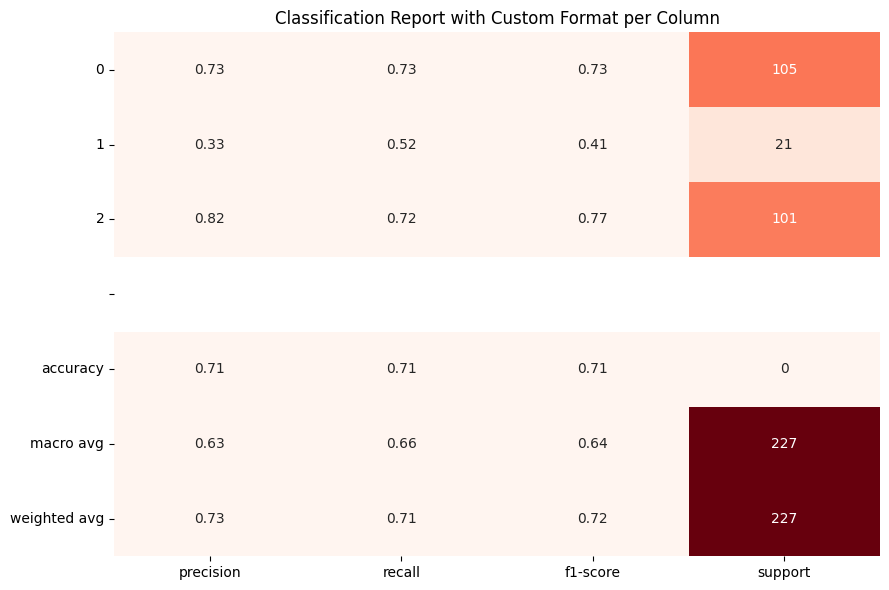

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

report = classification_report(y_test, y_predict1, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report['support'] = df_report['support'].astype(int)
blank_row = pd.DataFrame([[np.nan, np.nan, np.nan, np.nan]], index=[''], columns=['precision', 'recall', 'f1-score', 'support'])
class_labels = [idx for idx in df_report.index if idx.isdigit()]
summary_labels = ['accuracy', 'macro avg', 'weighted avg']
df_plot = pd.concat([
    df_report.loc[class_labels],
    blank_row,
    df_report.loc[summary_labels]
])
# Tạo ma trận chuỗi định dạng riêng biệt cho từng cột
annot = df_plot.copy().astype(str)

for row in annot.index:
    for col in annot.columns:
        val = df_plot.loc[row, col]
        if pd.isna(val):
            annot.loc[row, col] = ''
        elif col == 'support':
            annot.loc[row, col] = f"{val:.0f}"  # không có thập phân
        else:
            annot.loc[row, col] = f"{val:.2f}"  # 2 chữ số thập phân

# Vẽ heatmap với chuỗi định dạng riêng
plt.figure(figsize=(9, 6))
sns.heatmap(df_plot, annot=annot.values, fmt="", cmap="Reds", cbar=False)
plt.title("Classification Report with Custom Format per Column")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Ba dòng đầu là điểm cho từng class cự thể, ba dòng sau là điểm cho cả tập dataset


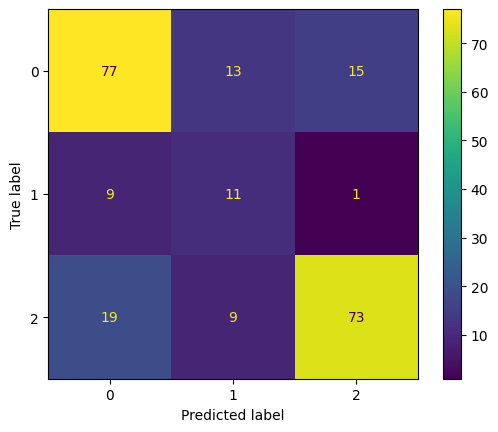

In [50]:
cm = confusion_matrix(y_test, y_predict1, labels=gridsearchcv_model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=gridsearchcv_model1.classes_)
disp.plot()

# Cách khác sau bước preprocessing để chạy mô hình : Sử dụng Lazypredict

- Hàm `LazyPredict` từ thư viện `lazypredict`: thư viện train nhanh dành cho các bài toàn ML Supervised và trả về 30-40 mô hình phù hợp

- Lưu ý rằng khi dùng `LazyPredict` thì nó sẽ fit bộ x_train, x_test, y_train, y_test trước bước preprocessing, tức là `LazyPredict` sử dụng x_train, x_test, y_train, y_test ở dạng dữ liệu ban đầu sau khi vừa được split ra thôi chứ chưa được áp dụng đoạn tiền xử lý dữ liệu của ta. Sau đó `LazyPredict` sẽ tự động làm bước preprocessing bên trong nó luôn. Nhưng như vậy ta không biết liệu nó có đúng không và hợp lý với logic của ta không, vì vậy để ép `LazyPredict` sử dụng x_train, x_test theo các bước preprocessing của ta, ta phải thêm đoạn fit_transform các biến x_train, x_test vào đoạn preprocessing ta làm


In [51]:
from sklearn.metrics import roc_auc_score

from lazypredict.Supervised import LazyClassifier

applied_step_preprocessing_to_features = Pipeline(steps= [
    ("preprocessor", preprocessor)
])

x_train_for_lazypredict = applied_step_preprocessing_to_features.fit_transform(x_train)
x_test_for_lazypredict = applied_step_preprocessing_to_features.transform(x_test) # Ng.lý : chỉ transform trên bộ test

# Dùng để kiểm tra xem có bị NaN ở đâu không
# print("NaNs in x_train_for_lazypredict:", np.isnan(x_train_for_lazypredict).sum())
# print("NaNs in x_test_for_lazypredict:", np.isnan(x_test_for_lazypredict).sum())

# Kiểm tra hình dạng (sau khi preprocessing)
# if isinstance(x_train_for_lazypredict, pd.DataFrame):
#     print("NaNs in x_train_for_lazypredict:", x_train_for_lazypredict.isnull().sum().sum())
#     print("NaNs in x_test_for_lazypredict:", x_test_for_lazypredict.isnull().sum().sum())
# else: # If it's a numpy array
#     print("NaNs in x_train_for_lazypredict:", np.isnan(x_train_for_lazypredict).sum())
#     print("NaNs in x_test_for_lazypredict:", np.isnan(x_test_for_lazypredict).sum())
    

clf = LazyClassifier(verbose=2, ignore_warnings=True, random_state=42)
clf.use_notebook_tqdm = False # Tắt tqdm trong Jupyter
models, predictions = clf.fit(x_train_for_lazypredict, x_test_for_lazypredict, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6651982378854625, 'Balanced Accuracy': np.float64(0.5262611975483262), 'ROC AUC': None, 'F1 Score': 0.6520531674385023, 'Time taken': 0.09520435333251953}
{'Model': 'BaggingClassifier', 'Accuracy': 0.7312775330396476, 'Balanced Accuracy': np.float64(0.6002828854314003), 'ROC AUC': None, 'F1 Score': 0.7229111406034028, 'Time taken': 0.04404568672180176}
{'Model': 'BernoulliNB', 'Accuracy': 0.6211453744493393, 'Balanced Accuracy': np.float64(0.5313531353135313), 'ROC AUC': None, 'F1 Score': 0.6414584238987477, 'Time taken': 0.011670351028442383}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.7048458149779736, 'Balanced Accuracy': np.float64(0.5304416155901305), 'ROC AUC': None, 'F1 Score': 0.6778833876013535, 'Time taken': 0.08095145225524902}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6960352422907489, 'Balanced Accuracy': np.float64(0.6255539839698255), 'ROC AUC': None, 'F1 Score': 0.6963080469539785, 'Time taken': 0.0078949928283

In [52]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.77,0.65,None,0.76,0.12
NearestCentroid,0.59,0.63,None,0.63,0.01
DecisionTreeClassifier,0.70,0.63,None,0.70,0.01
LGBMClassifier,0.76,0.61,None,0.74,0.22
BaggingClassifier,0.73,0.60,None,0.72,0.04
LogisticRegression,0.72,0.58,None,0.71,0.02
Perceptron,0.68,0.58,None,0.67,0.01
ExtraTreesClassifier,0.73,0.57,None,0.72,0.12
RandomForestClassifier,0.74,0.57,None,0.72,0.16


In [53]:
models_sorted = models.sort_values(by=["Balanced Accuracy","Time Taken"], ascending=[False, True]) # Dùng Balanced Accuracy vì đây là dữ liệu mất cân bằng và muốn đánh giá công bằng giữa các lớp

view_lazypredict_models = pd.DataFrame(models_sorted)
view_lazypredict_models[["Balanced Accuracy", "Time Taken"]] = view_lazypredict_models[["Balanced Accuracy", "Time Taken"]].apply(pd.to_numeric, errors='coerce')

view_lazypredict_models.style.format({
    "Balanced Accuracy": "{:.5f}",
    "Time Taken": "{:.5f}"
})

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.766520,0.65171,None,0.760420,0.11719
NearestCentroid,0.594714,0.62634,None,0.628923,0.01026
DecisionTreeClassifier,0.696035,0.62555,None,0.696308,0.00789
LGBMClassifier,0.757709,0.60713,None,0.744851,0.21608
BaggingClassifier,0.731278,0.60028,None,0.722911,0.04405
LogisticRegression,0.722467,0.58136,None,0.709663,0.01657
Perceptron,0.682819,0.57894,None,0.673356,0.00720
ExtraTreesClassifier,0.731278,0.57476,None,0.716152,0.12356
RandomForestClassifier,0.744493,0.57171,None,0.723255,0.15778


In [54]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

models = {
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(x_train_for_lazypredict, y_train)
    y_pred = model.predict(x_test_for_lazypredict)
    
    try:
        y_proba = model.predict_proba(x_test_for_lazypredict)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append([name, acc, auc, f1])

df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC", "F1 Score"])
df = df.sort_values("Accuracy", ascending=False)
print(df)


          Model  Accuracy  ROC AUC  F1 Score
0  RandomForest      0.74     0.88      0.72
2           SVC      0.73     0.87      0.70
1  DecisionTree      0.69     0.72      0.69
3           KNN      0.64     0.74      0.62
4    GaussianNB      0.25     0.68      0.24
